[nltk_data] Downloading package stopwords to C:\Users\AAKASH
[nltk_data]     PAL/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\AAKASH
[nltk_data]     PAL/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
100%|██████████| 9976/9976 [00:35<00:00, 278.37it/s]


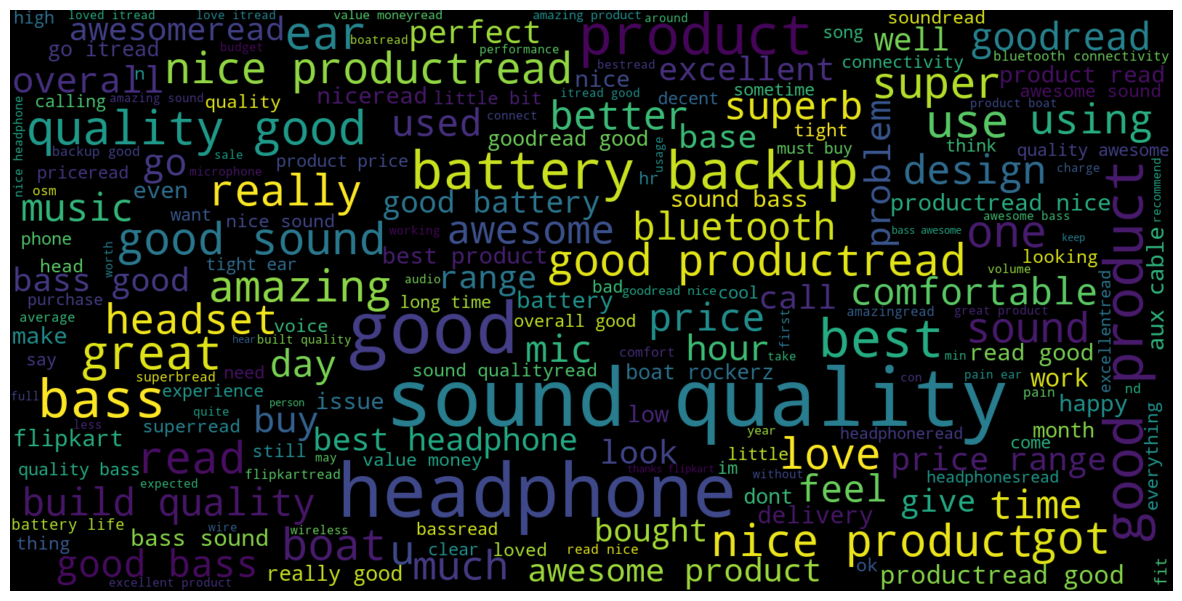

Training Accuracy: 0.9765075564866078
Test Accuracy: 0.8846037048284239


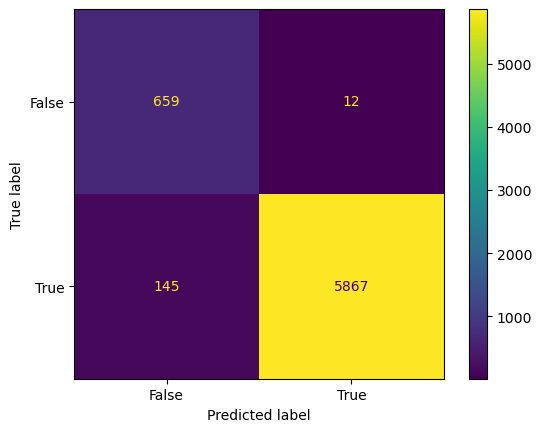

Vectorizer and model saved successfully!


In [ ]:
#!/usr/bin/env python
# coding: utf-8

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import re
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pickle
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from tqdm import tqdm

# Download NLTK resources
# nltk.download('stopwords')
# nltk.download('punkt')

# Load dataset
data = pd.read_csv('Training_Data.csv')

# Create labels based on ratings
pos_neg = [1 if rating >= 3 else 0 for rating in data['rating']]
data['label'] = pos_neg

# Preprocess text
def preprocess_text(text_data):
    preprocessed_text = []
    for sentence in tqdm(text_data):
        # Remove punctuations
        sentence = re.sub(r'[^\w\s]', '', sentence)
        # Convert to lowercase and remove stopwords
        preprocessed_text.append(
            ' '.join(
                token.lower() for token in nltk.word_tokenize(sentence)
                if token.lower() not in stopwords.words('english')
            )
        )
    return preprocessed_text

data['review'] = preprocess_text(data['review'].values)

# Generate WordCloud (optional visualization)
consolidated = ' '.join(word for word in data['review'][data['label'] == 1].astype(str))
wordCloud = WordCloud(width=1600, height=800, random_state=21, max_font_size=110)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

# Create TF-IDF features

cv = TfidfVectorizer(max_features=2500, ngram_range=(1, 2))  # Using bigrams
X = cv.fit_transform(data['review']).toarray()



# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, data['label'], test_size=0.33, stratify=data['label'], random_state=42)

# Train the model

# model = DecisionTreeClassifier(random_state=0)
model = DecisionTreeClassifier(random_state=0, class_weight='balanced')
model.fit(X_train, y_train)



# Evaluate the model
pred = model.predict(X_train)
print(f"Training Accuracy: {accuracy_score(y_train, pred)}")

# After training, make predictions on the test set
test_pred = model.predict(X_test)

# Evaluate the model
print(f"Test Accuracy: {accuracy_score(y_test, test_pred)}")

# Confusion Matrix (optional visualization)
cm = confusion_matrix(y_train, pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
cm_display.plot()
plt.show()

# Save vectorizer and model
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(cv, f)

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Vectorizer and model saved successfully!")



In [5]:
data.sample(10)

,review,rating,label
1272,2 year using still nice sound effect great hea...,5,1
9437,best headphone super bass everything supbb 999...,5,1
1205,nice sound quality bass also like one star fli...,5,1
4338,best read,5,1
6518,aweasomeread,4,1
5751,average headphone worth price believe normal u...,3,1
9403,product goodbut microphone quality bluetooth r...,4,1
3150,hmm good one like read,4,1
4758,product color awsmread,5,1
9083,best headphoneread,5,1


In [26]:
# unique ratings
pd.unique(data['rating'])

array([5, 4, 1, 3, 2], dtype=int64)

<Axes: xlabel='rating', ylabel='count'>

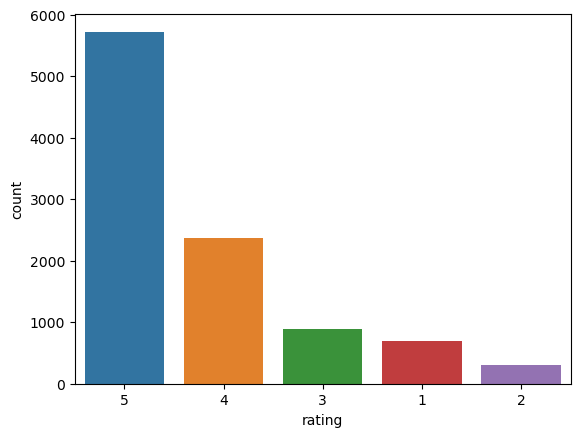

In [27]:
sns.countplot(data=data,
			x='rating',
			order=data.rating.value_counts().index)

In [28]:
data["label"].value_counts()

label
1    8975
0    1001
Name: count, dtype: int64